In [260]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import seaborn as sns

In [261]:
# will be created automatically if nothing else going on
spark = SparkSession.builder.getOrCreate()

In [262]:
# read in data
data = pd.read_csv("superstore.csv", encoding='cp1252')
data = ps.from_pandas(data)

Encoding is done to avoid invalid start byte error

In [263]:
# viewing the first few rows of the dataset 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [264]:
# getting all the columns of the dataset 
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

We are dealing with 21 columns in the superstore dataset. Let us look at the datatype of these columns. 

In [265]:
data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quant

We see that the dataset has a majority of object colummns, 2 int columns and 3 float columns. We look at the data description of the columns in the dataset. 

Row ID => Unique ID for each row.  

Order ID => Unique Order ID for each Customer.  

Order Date => Order Date of the product.  

Ship Date => Shipping Date of the Product.  

Ship Mode=> Shipping Mode specified by the Customer.  

Customer ID => Unique ID to identify each Customer.  

Customer Name => Name of the Customer.  

Segment => The segment where the Customer belongs.  

Country => Country of residence of the Customer.  

City => City of residence of of the Customer.  

State => State of residence of the Customer.  

Postal Code => Postal Code of every Customer.  

Region => Region where the Customer belong.  

Product ID => Unique ID of the Product.  

Category => Category of the product ordered.  

Sub-Category => Sub-Category of the product ordered.  

Product Name => Name of the Product  

Sales => Sales of the Product.  

Quantity => Quantity of the Product.  

Discount => Discount provided.  

Profit => Profit/Loss incurred.

In [266]:
# Count missing data 
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

We see that the data has no missing value.

In [268]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [269]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [270]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [271]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [272]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

A critical information from value_counts is that Country has constant value "United States" Constant hence we are dealing with data from United States only. We can go ahead and drop that column. We also drop ROWID and OrderID. RowID exists to maintain unique identification of records in a database. OrderID will give the same information as Order Name + Order Date + Ship Date would give. These would not prove critical during our analysis. 

In [273]:
data = data.drop(["Country", "Row ID", "Order ID", "Postal Code"], axis = 1)

In [274]:
# looking at the data agin
data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [275]:
data.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9994 non-null   object 
 1   Ship Date      9994 non-null   object 
 2   Ship Mode      9994 non-null   object 
 3   Customer ID    9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   City           9994 non-null   object 
 7   State          9994 non-null   object 
 8   Region         9994 non-null   object 
 9   Product ID     9994 non-null   object 
 10  Category       9994 non-null   object 
 11  Sub-Category   9994 non-null   object 
 12  Product Name   9994 non-null   object 
 13  Sales          9994 non-null   float64
 14  Quantity       9994 non-null   int64  
 15  Discount       9994 non-null   float64
 16  Profit         9994 non-null   float64
dtypes: float64(3), int64(1), object(13)

Convert Date columns to DateTime datatype and perform operations to create new columns from it

In [276]:
data['Order Date'] = ps.to_datetime(data['Order Date'])
data['Ship Date'] = ps.to_datetime(data['Ship Date'])

In [277]:
data['Order Day'] = ps.DatetimeIndex(data['Order Date']).day
data['Order Month'] = ps.DatetimeIndex(data['Order Date']).month
data['Order Year'] = ps.DatetimeIndex(data['Order Date']).year
data['Ship Day'] = ps.DatetimeIndex(data['Ship Date']).day
data['Ship Month'] = ps.DatetimeIndex(data['Ship Date']).day
data['Ship Year'] = ps.DatetimeIndex(data['Ship Date']).day

In [278]:
'''data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['City'] = data['City'].astype('category')
data['State'] = data['State'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')'''

"data['Ship Mode'] = data['Ship Mode'].astype('category')\ndata['Segment'] = data['Segment'].astype('category')\ndata['City'] = data['City'].astype('category')\ndata['State'] = data['State'].astype('category')\ndata['Category'] = data['Category'].astype('category')\ndata['Sub-Category'] = data['Sub-Category'].astype('category')"

In [279]:
data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year
0,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,11,2016,11,11,11
1,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,11,2016,11,11,11
2,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,6,2016,16,16,16
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,10,2015,18,18,18
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,10,2015,18,18,18


# EDA

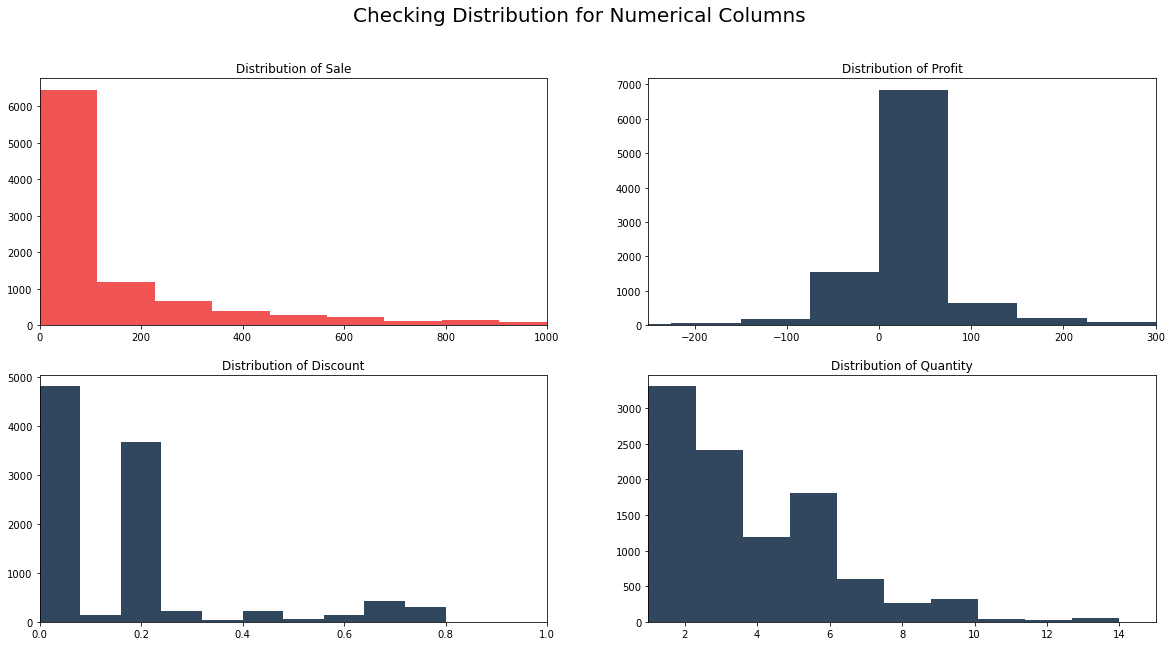

In [280]:
# Visualizing the histograms
plt.figure(figsize=[20,10])

plt.suptitle("Checking Distribution for Numerical Columns", size = 20)

# Histogram for Sales
plt.subplot(2,2,1)
plt.hist(data['Sales'], bins=200, color='#F05454')
plt.xlim(0,1000)
plt.title("Distribution of Sale")


plt.subplot(2,2,2)
plt.hist(data['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)
plt.title("Distribution of Profit")


plt.subplot(2,2,3)
plt.hist(data['Discount'], color='#30475E')
plt.xlim(0,1)
plt.title("Distribution of Discount")


plt.subplot(2,2,4)
plt.hist(data['Quantity'], color='#30475E')
plt.xlim(1,15)
plt.title("Distribution of Quantity")


plt.show()

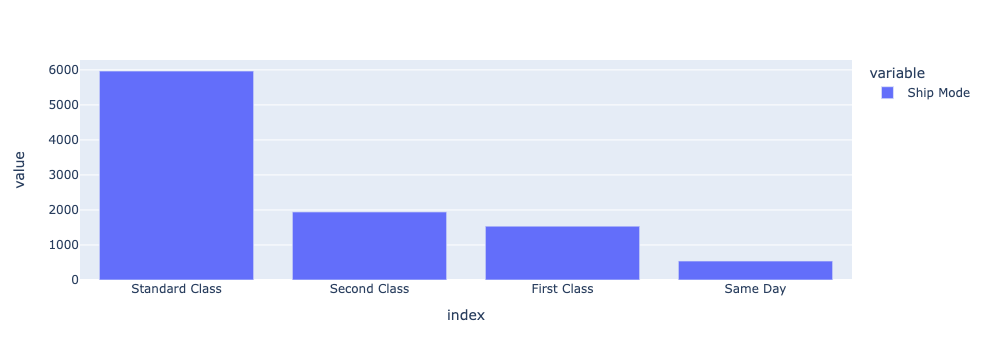

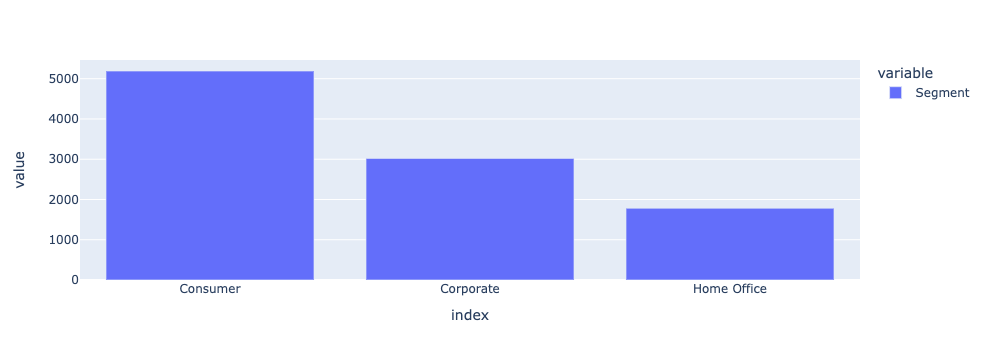

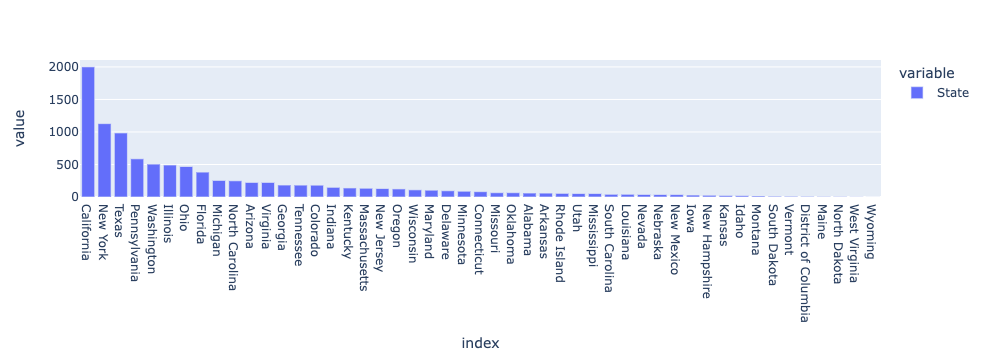

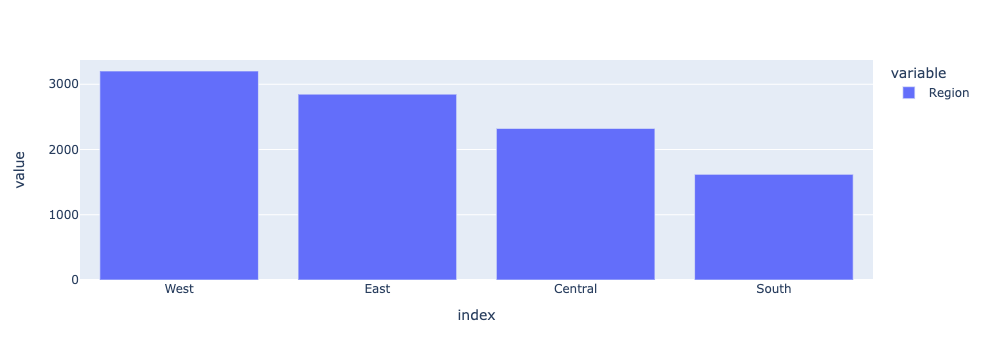

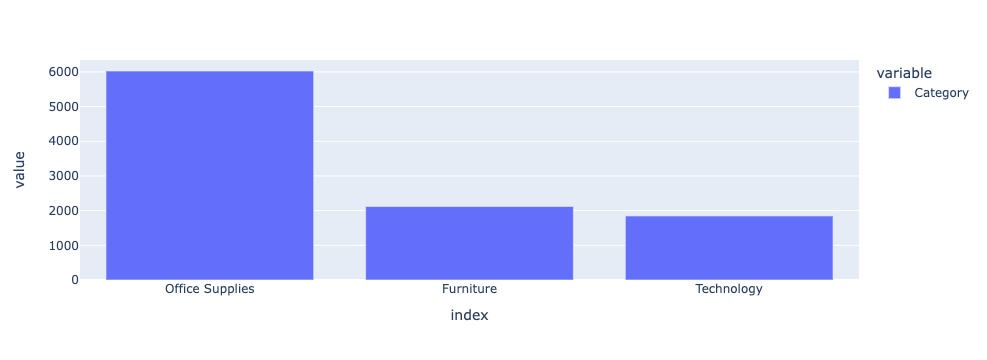

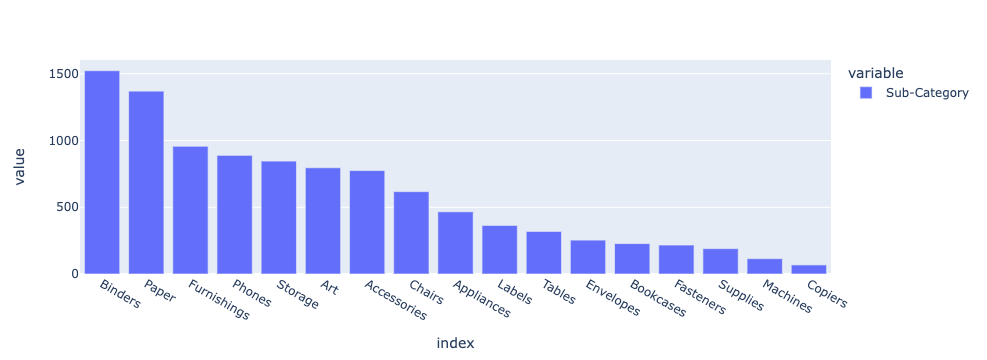

In [258]:
categotical_features=['Ship Mode','Segment', 'City', 'State','Region', 'Category', 'Sub-Category']

data['Ship Mode'].value_counts().plot(kind='bar').show()

data['Segment'].value_counts().plot(kind='bar').show()

data['State'].value_counts().plot(kind='bar').show()

data['Region'].value_counts().plot(kind='bar').show()

data['Category'].value_counts().plot(kind='bar').show()

data['Sub-Category'].value_counts().plot(kind='bar').show()

In [286]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/th/3zgcn6q92rq94j1f6jjmcfwc0000gn/T/ipykernel_4983/4136402251.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year
Sales,1.00,0.20,-0.03,0.48,0.00,-0.00,-0.01,0.01,0.01,0.01
Quantity,0.20,1.00,0.01,0.07,0.01,0.02,-0.01,0.00,0.00,0.00
Discount,-0.03,0.01,1.00,-0.22,-0.00,-0.00,-0.00,0.02,0.02,0.02
Profit,0.48,0.07,-0.22,1.00,-0.00,-0.00,0.00,0.01,0.01,0.01
Order Day,0.00,0.01,-0.00,-0.00,1.00,-0.03,-0.02,0.40,0.40,0.40
Order Month,-0.00,0.02,-0.00,-0.00,-0.03,1.00,-0.02,-0.01,-0.01,-0.01
Order Year,-0.01,-0.01,-0.00,0.00,-0.02,-0.02,1.00,-0.01,-0.01,-0.01
Ship Day,0.01,0.00,0.02,0.01,0.40,-0.01,-0.01,1.00,1.00,1.00
Ship Month,0.01,0.00,0.02,0.01,0.40,-0.01,-0.01,1.00,1.00,1.00
Ship Year,0.01,0.00,0.02,0.01,0.40,-0.01,-0.01,1.00,1.00,1.00


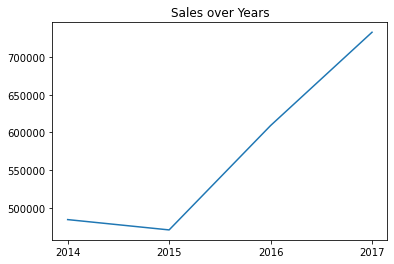

In [332]:
sales_yr = data.groupby(['Order Year'])['Sales'].sum().reset_index()
sales_yr = sales_yr.set_index('Order Year')
sales_yr.sort_index(inplace=True)
plt.xticks(sales_yr.index.to_list())
plt.title("Sales over Years")
plt.plot(sales_yr)

/Users/snehakaranjai/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/indexes/base.py:589: UserWarning:

We recommend using `Int64Index.to_numpy()` instead.

/Users/snehakaranjai/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/generic.py:638: UserWarning:

We recommend using `DataFrame.to_numpy()` instead.



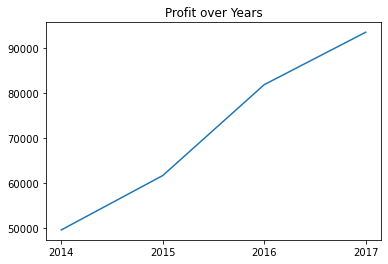

In [331]:
profit_yr = data.groupby(['Order Year'])['Profit'].sum().reset_index()
profit_yr = profit_yr.set_index('Order Year')
profit_yr.sort_index(inplace=True)
plt.xticks(profit_yr.index.to_list())
plt.title("Profit over Years")
plt.plot(profit_yr)

22/05/02 10:45:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 10:45:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 10:45:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 10:45:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


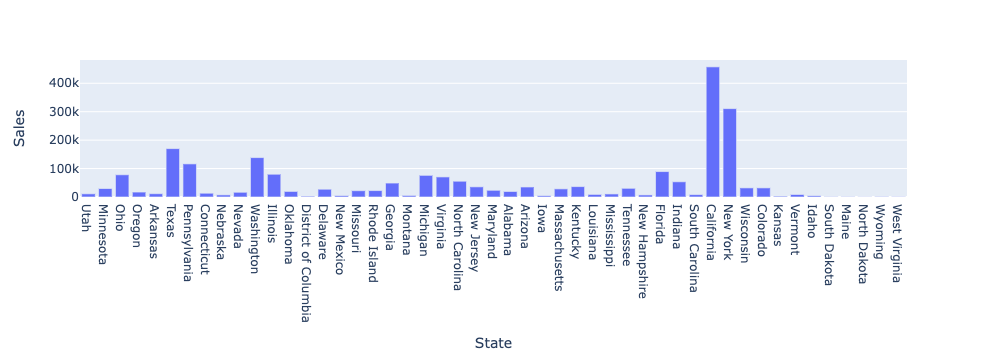

In [339]:
state_sales = data.groupby(['State'])['Sales'].sum().reset_index()
state_sales.plot.bar('State', 'Sales')


22/05/02 11:01:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:01:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:01:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:01:20 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


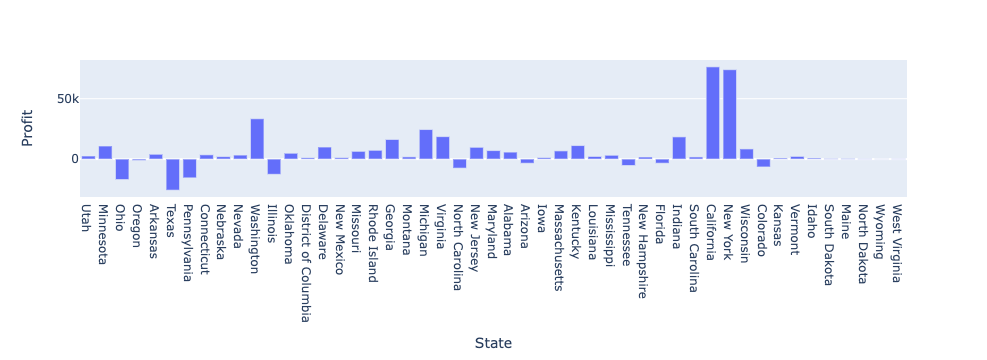

In [340]:
state_profit = data.groupby(['State'])['Profit'].sum().reset_index()
state_profit.plot.bar('State', 'Profit')

22/05/02 11:37:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:37:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:37:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:37:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


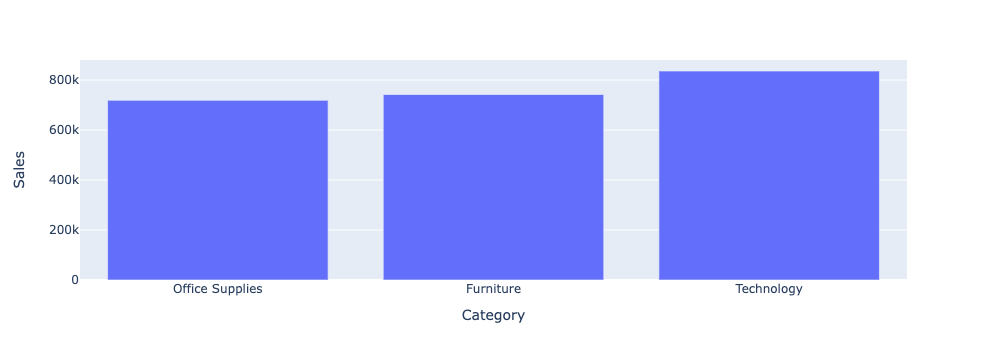

In [367]:
category_sales = data.groupby(['Category'])['Sales'].sum().reset_index()
category_sales.plot.bar('Category', 'Sales')

22/05/02 11:03:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:03:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:03:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


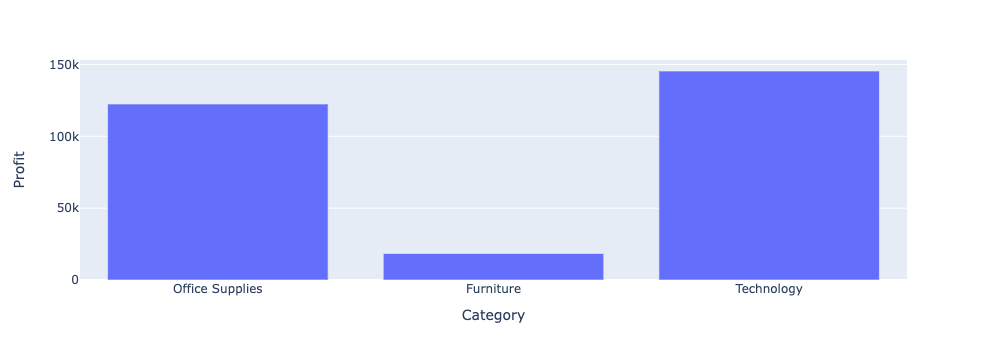

In [342]:
category_profit = data.groupby(['Category'])['Profit'].sum().reset_index()
category_profit.plot.bar('Category', 'Profit')

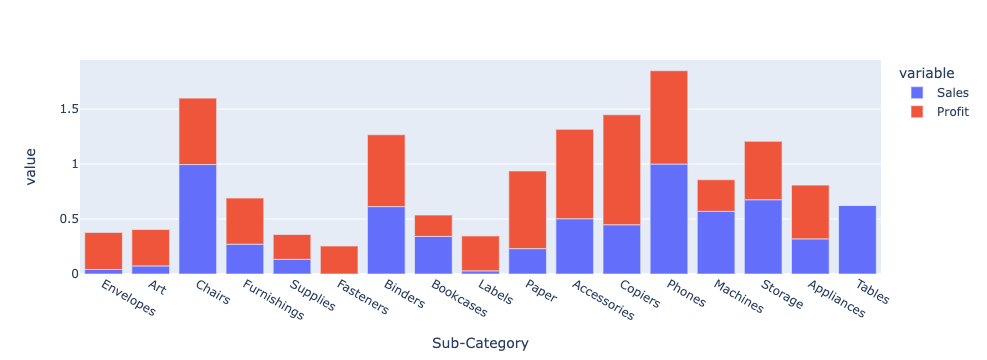

In [365]:
#Sub-Category

subcategory_sales = data.groupby(['Sub-Category'])[['Sales','Profit']].sum().reset_index()
# apply normalization techniques
for column in ['Sales', 'Profit']:
    subcategory_sales[column] = (subcategory_sales[column] - subcategory_sales[column].min()) / (subcategory_sales[column].max() - subcategory_sales[column].min())    
ID
subcategory_sales = subcategory_sales.set_index('Sub-Category')
subcategory_sales

subcategory_sales.plot.bar()

22/05/02 11:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:53:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/02 11:53:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


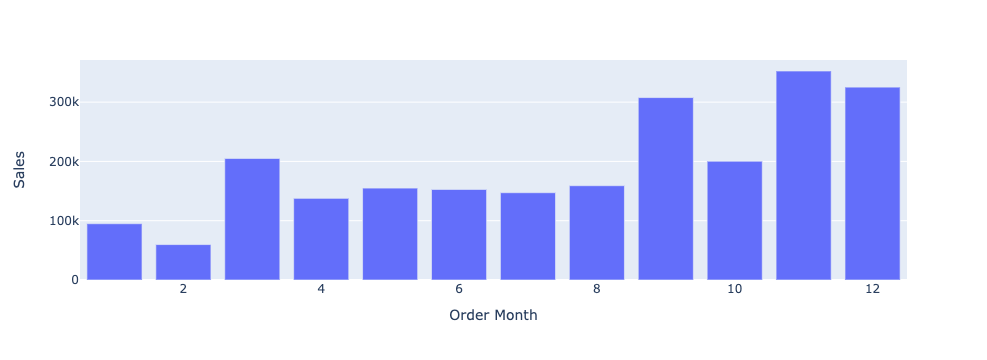

In [373]:
month_sales = data.groupby(['Order Month', 'Category'])['Sales'].sum().reset_index().set_index('Order Month')
month_sales.plot.bar('Order Month', 'Sales')

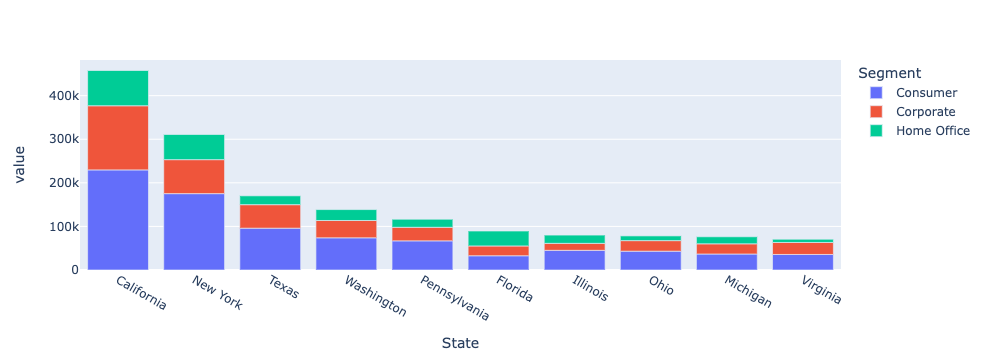

In [390]:
grouped_df = data.groupby(['State', 'Segment']).agg({'Sales':'sum'}).reset_index()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df = grouped_df.drop(columns=['Total', 'Segment'])
grouped_df = grouped_df.set_index('State')
grouped_df.head(10).plot.bar()

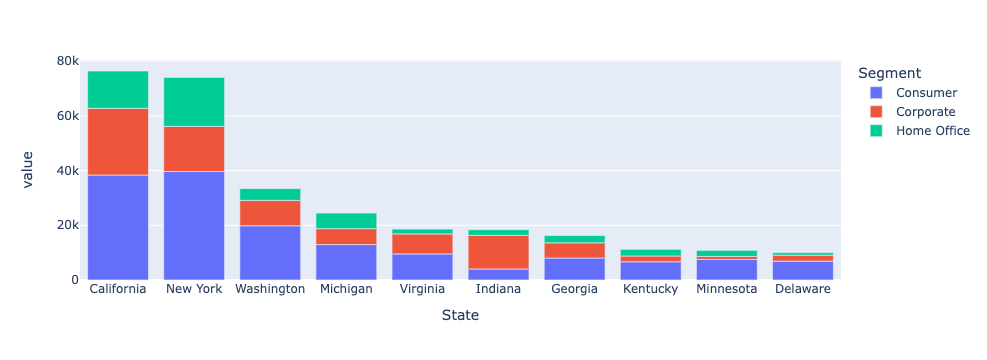

In [394]:
grouped_df = data.groupby(['State', 'Segment']).agg({'Profit':'sum'}).reset_index()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Profit').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df = grouped_df.drop(columns=['Total', 'Segment'])
grouped_df = grouped_df.set_index('State')
grouped_df.head(10).plot.bar()

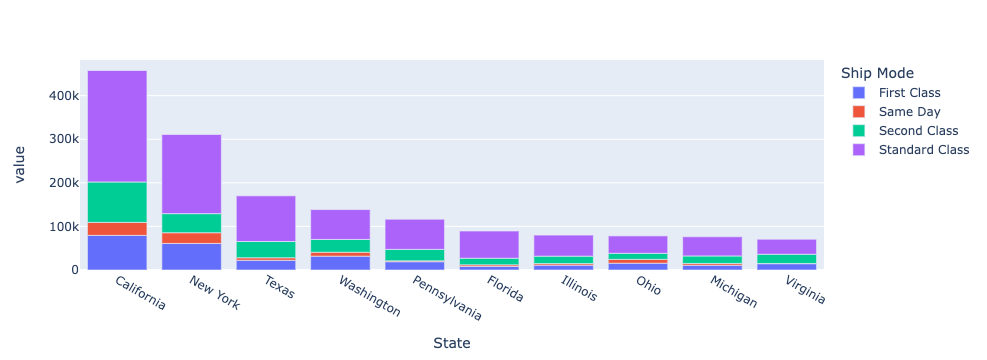

In [391]:
grouped_df = data.groupby(['State', 'Ship Mode']).agg({'Sales':'sum'}).reset_index()
grouped_df = grouped_df.pivot(index='State', columns='Ship Mode', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Standard Class'] + grouped_df['Second Class'] + grouped_df['First Class'] + grouped_df['Same Day']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df = grouped_df.drop(columns=['Total', 'Ship Mode'])
grouped_df = grouped_df.set_index('State')
grouped_df.head(10).plot.bar()

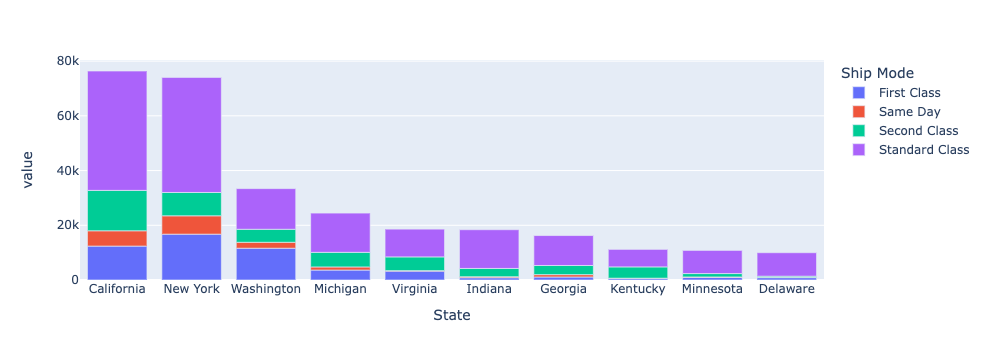

In [393]:
grouped_df = data.groupby(['State', 'Ship Mode']).agg({'Profit':'sum'}).reset_index()
grouped_df = grouped_df.pivot(index='State', columns='Ship Mode', values='Profit').reset_index()
grouped_df['Total'] = grouped_df['Standard Class'] + grouped_df['Second Class'] + grouped_df['First Class'] + grouped_df['Same Day']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df = grouped_df.drop(columns=['Total', 'Ship Mode'])
grouped_df = grouped_df.set_index('State')
grouped_df.head(10).plot.bar()

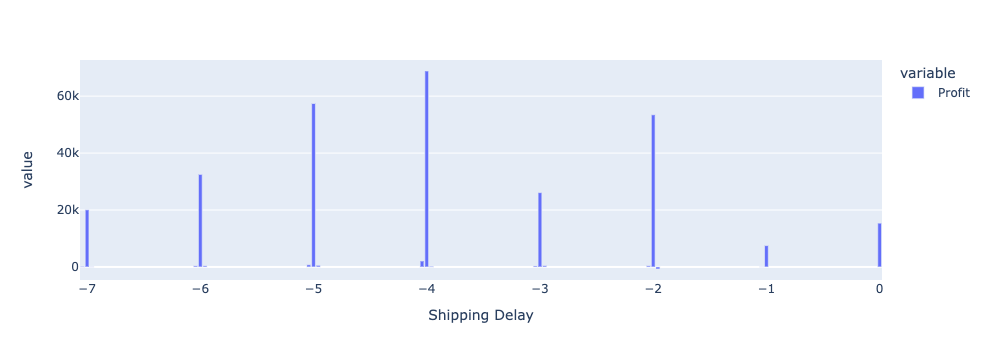

In [412]:
data['Shipping Delay'] = (data['Order Date'] - data['Ship Date']) / (60 * 60 * 24)
data['Shipping Delay'].astype('int')

subcategory_sales = data.groupby(['Shipping Delay'])[['Profit']].sum().reset_index()
# apply normalization techniques
subcategory_sales = subcategory_sales.set_index('Shipping Delay')
subcategory_sales

subcategory_sales.plot.bar()